<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_3_B2_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing and Installing Required Libraries**

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 13.3 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 6.6 MB 41.6 MB/s 
     |████████████████████████████████| 895 kB 58.6 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install textblob

In [ ]:
!pip install langid

     |████████████████████████████████| 1.9 MB 12.7 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=a816e18682bfe95f98ab94dcb5699b86a9a1a4b7c4be1d56e79ca4abbe51082e
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
Successfully built langid


In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 11.8 MB/s 
     |████████████████████████████████| 462 kB 87.2 MB/s 


###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification
from tqdm.notebook import tqdm
from gensim.parsing.preprocessing import remove_stopwords
from langid.langid import LanguageIdentifier, model
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk.corpus
from nltk.probability import FreqDist
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


###**Mounting the Drive**

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' -> '/content/Dataset'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE' -> '/content/Dataset/ADVE'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000136188.jpg' -> '/content/Dataset/ADVE/0000136188.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0030048095.jpg' -> '/content/Dataset/ADVE/0030048095.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000556056.jpg' -> '/content/Dataset/ADVE/0000556056.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04106546.jpg' -> '/content/Dataset/ADVE/04106546.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04102204.jpg' -> '/content/Dataset/ADVE/04102204.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04412344.jpg' -> '/content/Dataset/ADVE/04412344.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project

In [ ]:
# importing the dataframe
imgpath_text_df = pd.read_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

,label,path,text,clean_text
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...
...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...


In [ ]:
# checking NaNs and replacing any with ' ' string
print('Number of NaN values in clean_text column:\n',imgpath_text_df['clean_text'].isnull().sum())

# filling NaNs with ' '
imgpath_text_df.fillna(' ', inplace=True)

# viewing NaNs again
print('Number of NaN values in clean_text column after replacing:\n',imgpath_text_df['clean_text'].isnull().sum())

Number of NaN values in clean_text column:
 21
Number of NaN values in clean_text column after replacing:
 0


##**Detecting the language of all text**

In [ ]:
# now we will detect the language for each row
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
imgpath_text_df['language'] = [identifier.classify(text)[0] for text in imgpath_text_df['clean_text']]
imgpath_text_df['lang_prob'] = [identifier.classify(text)[1] for text in imgpath_text_df['clean_text']]
display(imgpath_text_df)

,label,path,text,clean_text,language,lang_prob
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,br,0.965464
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,gl,0.910893
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.000000
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.000000
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.000000
...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,en,1.000000
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,en,1.000000
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,en,1.000000
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,en,1.000000


In [ ]:
# viewing value counts for language column
display(imgpath_text_df['language'].value_counts())

en    3306
la      42
de      39
br      13
lb      13
fr      11
es      10
nl       9
an       9
af       8
tl       6
cy       5
it       5
ro       2
ht       2
da       2
bs       1
gl       1
sl       1
eo       1
pl       1
sq       1
id       1
no       1
zu       1
sv       1
Name: language, dtype: int64

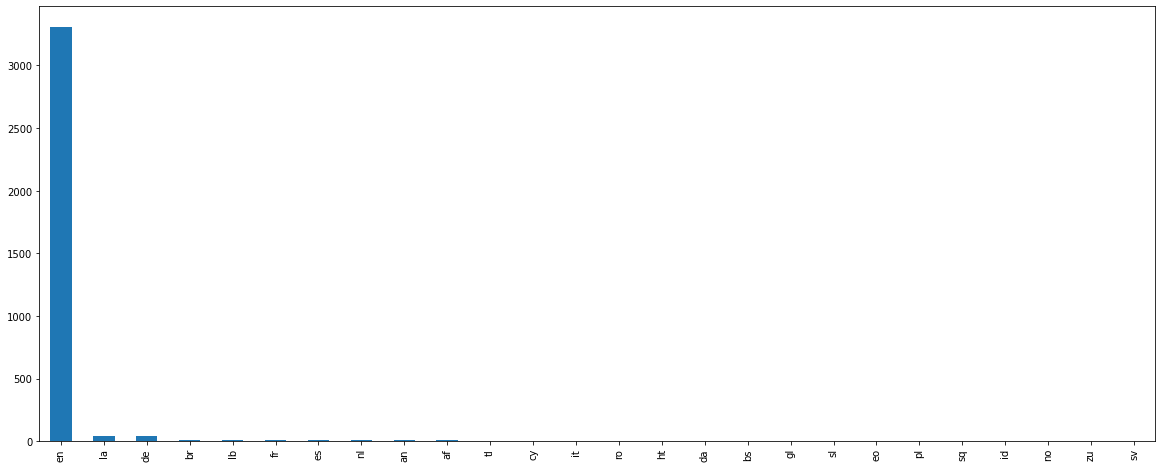

In [ ]:
# viewing value counts for language column
imgpath_text_df['language'].value_counts().plot(kind='bar', figsize=(20,8))


For Note:



en    159
af      5
de      5
br      4
an      4
lb      4
es      3
la      2
fr      2
nl      2
cy      2
it      2
id      1
pl      1
sq      1
sl      1
gl      1
bs      1
eo      1
ro      1
Name: language, dtype: int64


For Form:



en    368
de     26
la     13
lb      7
an      5
br      4
nl      3
fr      3
no      1
es      1
zu      1
Name: language, dtype: int64


For Email:



en    592
la      2
tl      2
br      2
lb      1
nl      1
Name: language, dtype: int64


For Letter:



en    568
Name: language, dtype: int64


For News:



en    161
la     15
fr      3
cy      2
de      2
it      2
es      2
tl      1
br      1
Name: language, dtype: int64


For ADVE:



en    202
la      6
es      4
tl      3
nl      3
af      2
ht      2
da      2
br      2
ro      1
cy      1
fr      1
lb      1
it      1
Name: language, dtype: int64


For Memo:



en    620
de      1
Name: language, dtype: int64


For Resume:



en    120
de      1
Name: language, dtype: int64


For Scientific:



en    254
de      3
fr      2
af      1
sv      1
la      1
Name: language, dtype: int64


For Report:



en    262
la      3
de      1
Name: language, dtype: int64

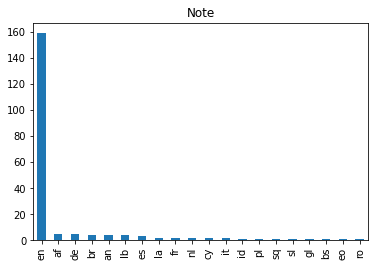

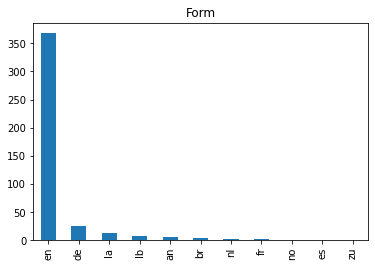

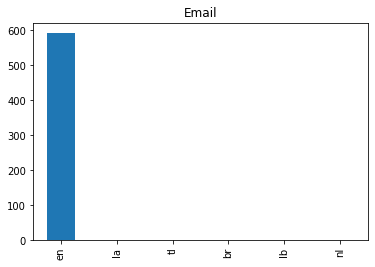

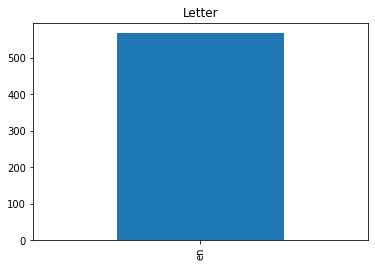

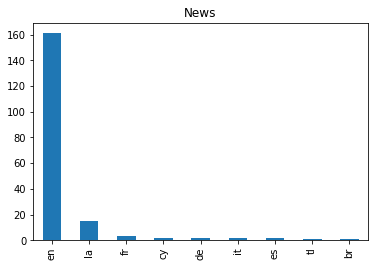

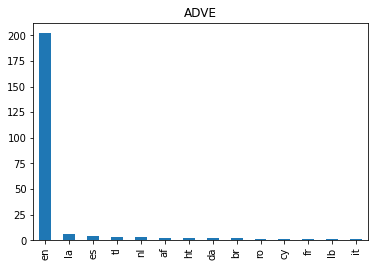

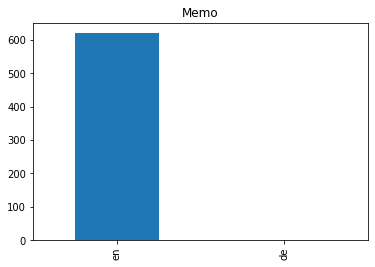

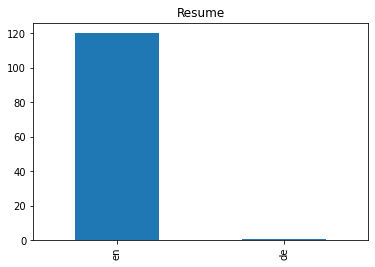

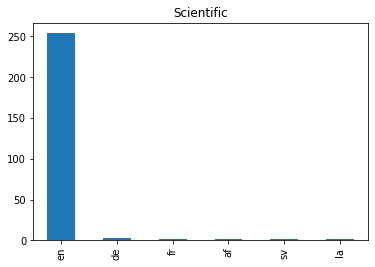

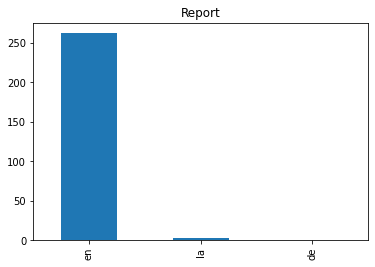

In [ ]:
# viewing the distribution of languages for each label

for label in list(imgpath_text_df['label'].unique()):
  print('\nFor '+label+':\n')
  temp_df = imgpath_text_df[imgpath_text_df['label']==label]
  plt.figure()
  display(temp_df['language'].value_counts())
  temp_df['language'].value_counts().plot(kind='bar',title=label)

**Since the dataset contains mixed languages and there share is not significant, I will be removing those columns**

In [ ]:
# filtering the dataset to get only images with english text
imgpath_text_df_en = imgpath_text_df[imgpath_text_df['language']=='en'].copy()

# viewing the first five rows
display(imgpath_text_df_en.head())

# confirming that the filtering was done properly
display(imgpath_text_df_en['language'].value_counts())

,label,path,text,clean_text,language,lang_prob
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0


en    3306
Name: language, dtype: int64

##**Removing StopWords and Words less than 3 characters**

In [ ]:
imgpath_text_df_en['clean_text_without_stopwords'] = [remove_stopwords(text) for text in imgpath_text_df_en['clean_text']]
imgpath_text_df_en['clean_text_without_stopwords'] = [re.sub(r'\b\w{1,3}\b', "",text) for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(imgpath_text_df_en.head())

,label,path,text,clean_text,language,lang_prob,clean_text_without_stopwords
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0,cane cirneten tharjen thew dete p...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0,produc site health policy center batta g...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0,slzese stupts cover froo lavwel agase qe...
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0,ceol chance recordive cork radel seen...
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0,paula desel ayes hate clei lonkvacts ...


##**Preparing Final DataFrame with Text and Labels**

In [ ]:
final_df = imgpath_text_df_en[['label','clean_text_without_stopwords']].copy()
final_df.rename(columns = {'label':'Category', 'clean_text_without_stopwords':'Text'}, inplace = True)
final_df.head()

,Category,Text
2,Note,cane cirneten tharjen thew dete p...
3,Note,produc site health policy center batta g...
4,Note,slzese stupts cover froo lavwel agase qe...
6,Note,ceol chance recordive cork radel seen...
8,Note,paula desel ayes hate clei lonkvacts ...


In [ ]:
final_df['Labels'] = final_df['Category'].map({'Form': 0, 'ADVE': 1, 'Memo': 2, 'Letter': 3, 'Resume': 4, 'Note': 5, 'Email': 6, 'Scientific': 7, 'Report': 8, 'News': 9 })

final_df.head()

,Category,Text,Labels
2,Note,cane cirneten tharjen thew dete p...,5
3,Note,produc site health policy center batta g...,5
4,Note,slzese stupts cover froo lavwel agase qe...,5
6,Note,ceol chance recordive cork radel seen...,5
8,Note,paula desel ayes hate clei lonkvacts ...,5


In [ ]:
y = tf.keras.utils.to_categorical(final_df["Labels"].values, num_classes=10)

x_train, x_test, y_train, y_test = train_test_split(final_df['Text'], y, test_size=0.25)

In [ ]:
preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']

In [ ]:
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
model_x = preprocessor(input_text)
model_x = encoder(model_x)
model_x = tf.keras.layers.Dropout(0.2, name="dropout")(model_x['pooled_output'])
model_x = tf.keras.layers.Dense(10, activation='softmax', name="output")(model_x)

model = tf.keras.Model(input_text, model_x)

In [ ]:
n_epochs = 10

model.compile(optimizer = "adam", loss = "categorical_crossentropy",  metrics = ['accuracy'])

model_fit = model.fit(x_train, y_train, epochs = n_epochs, validation_data = (x_test, y_test), verbose=1)

Epoch 1/10
78/78 [==============================] - 1131s 14s/step - loss: 1.9049 - accuracy: 0.3356 - val_loss: 1.5704 - val_accuracy: 0.4849
Epoch 2/10
78/78 [==============================] - 1128s 15s/step - loss: 1.4424 - accuracy: 0.5301 - val_loss: 1.3012 - val_accuracy: 0.6203
Epoch 3/10
78/78 [==============================] - 1133s 15s/step - loss: 1.2123 - accuracy: 0.6224 - val_loss: 1.1745 - val_accuracy: 0.6397
Epoch 4/10
78/78 [==============================] - 1124s 14s/step - loss: 1.1081 - accuracy: 0.6458 - val_loss: 1.0888 - val_accuracy: 0.6614
Epoch 5/10
78/78 [==============================] - 1175s 15s/step - loss: 1.0242 - accuracy: 0.6753 - val_loss: 1.0348 - val_accuracy: 0.6771
Epoch 6/10
78/78 [==============================] - 1171s 15s/step - loss: 0.9677 - accuracy: 0.6902 - val_loss: 1.0319 - val_accuracy: 0.6542
Epoch 7/10
78/78 [==============================] - 1160s 15s/step - loss: 0.9308 - accuracy: 0.7003 - val_loss: 0.9849 - val_accuracy: 0.6796

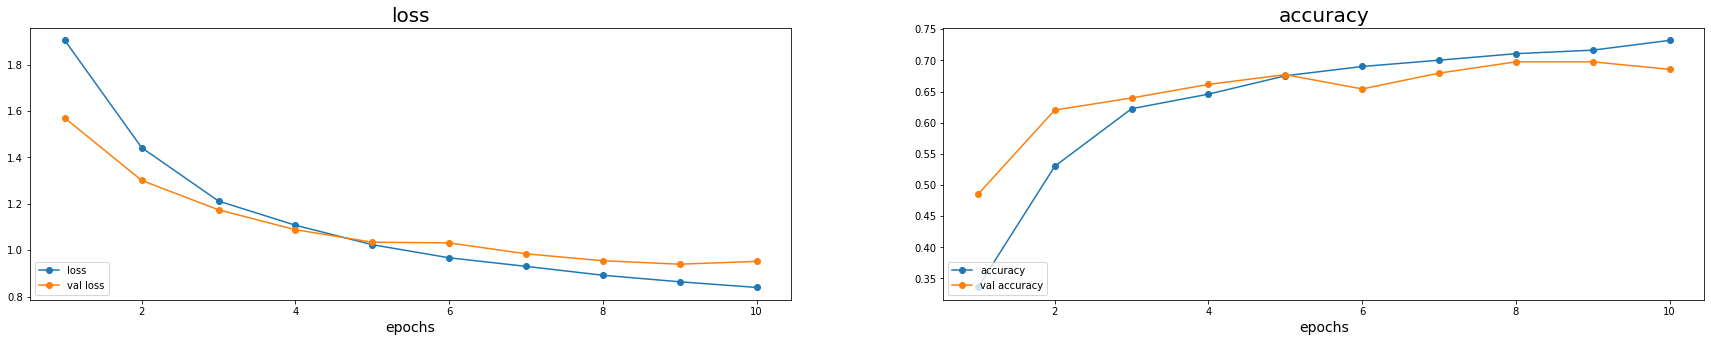

In [ ]:
label_names = ['Form', 'ADVE', 'Memo', 'Letter', 'Resume', 'Note', 'Email', 'Scientific', 'Report', 'News']
range_x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(range_x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(range_x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

In [ ]:
def predict_class(text):
  '''predict class of input text
  Args:
    - text (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(text)]

In [ ]:
y_pred = predict_class(x_test)
print('\ny_pred:\n')
display(y_pred)
print('\ny_test:\n')
display(y_test)


y_pred:



[5,
 6,
 6,
 8,
 5,
 2,
 3,
 3,
 2,
 2,
 3,
 7,
 8,
 6,
 5,
 6,
 3,
 2,
 7,
 3,
 3,
 3,
 2,
 0,
 9,
 6,
 4,
 8,
 5,
 6,
 8,
 2,
 0,
 2,
 9,
 6,
 6,
 3,
 6,
 8,
 0,
 3,
 5,
 2,
 5,
 3,
 3,
 2,
 2,
 5,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 7,
 4,
 6,
 7,
 8,
 2,
 5,
 5,
 3,
 3,
 0,
 2,
 3,
 1,
 6,
 9,
 3,
 8,
 2,
 7,
 8,
 6,
 6,
 6,
 0,
 0,
 7,
 6,
 5,
 3,
 0,
 3,
 2,
 2,
 1,
 2,
 6,
 6,
 2,
 2,
 6,
 1,
 8,
 1,
 5,
 1,
 1,
 6,
 6,
 0,
 2,
 0,
 3,
 0,
 2,
 2,
 0,
 2,
 3,
 5,
 2,
 0,
 5,
 6,
 3,
 7,
 0,
 7,
 1,
 1,
 2,
 7,
 6,
 3,
 8,
 8,
 2,
 6,
 1,
 7,
 6,
 7,
 2,
 3,
 4,
 2,
 6,
 7,
 6,
 2,
 2,
 2,
 1,
 7,
 3,
 8,
 2,
 8,
 0,
 4,
 8,
 2,
 2,
 6,
 7,
 2,
 2,
 0,
 9,
 1,
 3,
 6,
 0,
 2,
 1,
 2,
 3,
 0,
 2,
 6,
 5,
 6,
 7,
 2,
 2,
 5,
 2,
 9,
 6,
 6,
 5,
 3,
 0,
 3,
 2,
 2,
 2,
 2,
 3,
 6,
 3,
 6,
 2,
 6,
 5,
 6,
 7,
 9,
 2,
 2,
 8,
 2,
 0,
 3,
 5,
 6,
 2,
 6,
 5,
 6,
 0,
 3,
 2,
 6,
 0,
 0,
 6,
 5,
 2,
 3,
 1,
 6,
 2,
 5,
 2,
 8,
 2,
 6,
 6,
 2,
 2,
 0,
 8,
 9,
 2,
 8,
 3,
 2,
 3,
 4,
 5,
 3,
 7,



y_test:



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_n = [np.argmax(a) for a in y_test]
display([np.argmax(a) for a in y_test])

[5,
 6,
 6,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 3,
 0,
 8,
 6,
 5,
 6,
 3,
 2,
 7,
 3,
 3,
 3,
 2,
 7,
 8,
 6,
 4,
 2,
 5,
 6,
 8,
 0,
 0,
 0,
 9,
 6,
 6,
 3,
 6,
 7,
 0,
 2,
 5,
 8,
 1,
 3,
 3,
 7,
 2,
 5,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 7,
 4,
 6,
 8,
 7,
 3,
 6,
 5,
 3,
 0,
 0,
 3,
 3,
 1,
 6,
 9,
 8,
 8,
 2,
 8,
 8,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 1,
 3,
 0,
 3,
 2,
 9,
 7,
 3,
 6,
 3,
 2,
 2,
 6,
 5,
 3,
 1,
 5,
 1,
 0,
 6,
 6,
 0,
 2,
 0,
 9,
 0,
 0,
 6,
 0,
 8,
 3,
 5,
 3,
 0,
 5,
 6,
 3,
 7,
 0,
 7,
 7,
 1,
 2,
 0,
 6,
 3,
 2,
 7,
 3,
 6,
 5,
 7,
 6,
 8,
 6,
 2,
 4,
 3,
 6,
 7,
 6,
 9,
 2,
 8,
 1,
 7,
 9,
 3,
 2,
 8,
 0,
 7,
 3,
 3,
 2,
 6,
 7,
 2,
 2,
 0,
 9,
 1,
 3,
 6,
 0,
 0,
 1,
 0,
 3,
 3,
 8,
 6,
 5,
 0,
 7,
 2,
 5,
 5,
 2,
 9,
 6,
 6,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 8,
 3,
 6,
 9,
 6,
 2,
 6,
 0,
 6,
 0,
 9,
 0,
 2,
 8,
 0,
 0,
 3,
 5,
 6,
 0,
 6,
 5,
 2,
 0,
 3,
 3,
 6,
 0,
 0,
 6,
 5,
 3,
 3,
 1,
 6,
 1,
 6,
 2,
 2,
 2,
 6,
 6,
 3,
 3,
 0,
 7,
 9,
 2,
 8,
 3,
 2,
 9,
 4,
 5,
 3,
 7,


In [ ]:
print(classification_report(y_test_n, y_pred,target_names=label_names))

              precision    recall  f1-score   support

        Form       0.81      0.54      0.65       112
        ADVE       0.77      0.63      0.69        52
        Memo       0.51      0.78      0.62       141
      Letter       0.63      0.68      0.65       128
      Resume       0.90      1.00      0.95        26
        Note       0.67      0.65      0.66        43
       Email       0.89      0.85      0.87       164
  Scientific       0.69      0.55      0.61        60
      Report       0.47      0.45      0.46        56
        News       0.89      0.56      0.68        45

    accuracy                           0.69       827
   macro avg       0.72      0.67      0.68       827
weighted avg       0.71      0.69      0.69       827

